In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from datetime import datetime

In [2]:
df = pd.read_csv(Path('JNorth_Adult_Site.csv'))
df.head()

C:\conda\envs\mlenv\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,id,sighting_date,species,number,latitude,longitude,flag_location,comments,school,grade,image_url,customerid,number_old,flag_number,species_old,flag_species
0,0,850841703,12/16/1996,Monarch Adult Sighted,1,27.594,-81.362,0,On the ballfield a solitary monarch butterfly ...,Walker memorial junior academy,10.0,-999999.999,135,-999999.999,1,Monarch Butterfly,1
1,1,851824801,12/6/1996,Monarch Adult Sighted,1,30.420,-87.224,0,Our 5th grade Discovery students who went alon...,Hambrick elementary school,5.0,-999999.999,150,-999999.999,1,Monarch Butterfly,1
2,2,854409931,9/21/1996,Monarch Adult Sighted,1,40.817,-96.710,0,We saw several hundred monarchs in our school ...,-999999.999,5.0,-999999.999,9701054,-999999.999,1,Monarch Butterfly,1
3,3,854557206,9/21/1996,Monarch Adult Sighted,1,40.817,-96.710,0,Over a hundered monarchs in our school butterf...,Fredstrom elementary school,6.0,-999999.999,175,-999999.999,1,Monarch Butterfly,1
4,4,855061862,1/1/1997,Monarch Adult Sighted,1,34.244,-77.946,0,"I Thought I Saw It, But I Was Suprised To See ...",Gregory,3.0,-999999.999,181,-999999.999,1,Monarch Butterfly,1


In [3]:
# adding a column for year
#df = df.astype({'sighting_date': 'datetime64[ns]'})
#df['sighting_date'] =  pd.to_datetime(df['sighting_date'], format='%m/%d/%Y')
df['year'] = pd.DatetimeIndex(df['sighting_date']).year
df['year'] = pd.to_datetime(df.year, format='%Y')
#df['sighting_date'] =  pd.to_datetime(df['sighting_date'], format='%Y')
#df = df.astype({'year': 'datetime64[ns]'})
#df['year'] = df['year'].astype(date)
# changing year into date
#df['year'] = df.year.strftime("%Y%m%d")
#df.dtypes
df.head()

,Unnamed: 0,id,sighting_date,species,number,latitude,longitude,flag_location,comments,school,grade,image_url,customerid,number_old,flag_number,species_old,flag_species,year
0,0,850841703,12/16/1996,Monarch Adult Sighted,1,27.594,-81.362,0,On the ballfield a solitary monarch butterfly ...,Walker memorial junior academy,10.0,-999999.999,135,-999999.999,1,Monarch Butterfly,1,1996-01-01
1,1,851824801,12/6/1996,Monarch Adult Sighted,1,30.420,-87.224,0,Our 5th grade Discovery students who went alon...,Hambrick elementary school,5.0,-999999.999,150,-999999.999,1,Monarch Butterfly,1,1996-01-01
2,2,854409931,9/21/1996,Monarch Adult Sighted,1,40.817,-96.710,0,We saw several hundred monarchs in our school ...,-999999.999,5.0,-999999.999,9701054,-999999.999,1,Monarch Butterfly,1,1996-01-01
3,3,854557206,9/21/1996,Monarch Adult Sighted,1,40.817,-96.710,0,Over a hundered monarchs in our school butterf...,Fredstrom elementary school,6.0,-999999.999,175,-999999.999,1,Monarch Butterfly,1,1996-01-01
4,4,855061862,1/1/1997,Monarch Adult Sighted,1,34.244,-77.946,0,"I Thought I Saw It, But I Was Suprised To See ...",Gregory,3.0,-999999.999,181,-999999.999,1,Monarch Butterfly,1,1997-01-01


In [4]:
filterdate = input("Which year do you want to look forward from?: ")

df = df.loc[(df["year"] >= filterdate)]

Which year do you want to look forward from?: 2016


In [5]:
# Adding a column for month

df['month'] = pd.DatetimeIndex(df['sighting_date']).month
df.head()

,Unnamed: 0,id,sighting_date,species,number,latitude,longitude,flag_location,comments,school,grade,image_url,customerid,number_old,flag_number,species_old,flag_species,year,month
32512,91164,1449525336,1/1/2016,Monarch Adult Sighted,1,19.670,-100.280,1,"<font size=""4"" face=""Verdana, Arial, Helvetica...",-999999.999,-999999.999,-999999.999,9710973,-999999.999,1,Monarch Migration Sighting OW,1,2016-01-01,1
32513,91165,1449525529,1/1/2016,Monarch Adult Sighted,1,19.590,-100.266,1,"<div align=""left""><strong><font size=""5"" face=...",-999999.999,-999999.999,-999999.999,9710973,-999999.999,1,Monarch Migration Sighting OW,1,2016-01-01,1
32558,91306,1451875416,1/2/2016,Monarch Adult Sighted,1,36.315,-75.812,1,I saw one Monarch flying low over the grass on...,-999999.999,-999999.999,-999999.999,9979544,1.000,0,Monarch Adult Sighted,0,2016-01-01,1
32559,91308,1451954572,1/4/2016,Monarch Adult Sighted,1,28.864,-97.025,1,After a week of cold rainy days(40's). First ...,-999999.999,-999999.999,https://journeynorth.org/jnorth/images/userfil...,9988763,1.000,0,Monarch Adult Sighted,0,2016-01-01,1
32560,91310,1452108198,1/6/2016,Monarch Adult Sighted,1,28.179,-80.600,1,Tagged monarch tag # UNU 822,-999999.999,-999999.999,https://journeynorth.org/jnorth/images/userfil...,9989296,1.000,0,Monarch Adult Sighted,0,2016-01-01,1


In [6]:
# combining the year and month
#df['month_and_year'] = pd.to_datetime(df.year.astype(str) + '-' + df.month.astype(str))
#df.head()


In [7]:
northlat = input("Enter the North latitude: ")
southlat = input("Enter the South latitude: ")
eastlat = input("Enter the East longitude: ")
westlat = input("Enter the West longitude: ")

Enter the North latitude: 42.02
Enter the South latitude: 41.35
Enter the East longitude: -71.15
Enter the West longitude: -71.79


In [24]:
northlat = float(northlat)
southlat = float(southlat)
eastlat = float(eastlat)
westlat = float(westlat)

In [25]:
df = df.loc[(df["latitude"] >= southlat) & (df["latitude"] <= northlat) & (df["longitude"] >= westlat) & (df["longitude"] <= eastlat)]
df.head()

,Unnamed: 0,id,sighting_date,species,number,latitude,longitude,flag_location,comments,school,grade,image_url,customerid,number_old,flag_number,species_old,flag_species,year,month
33879,97143,1464663964,7/16/2016,Monarch Adult Sighted,1,41.448,-71.488,1,Female -- ovipositing.,-999999.999,-999999.999,-999999.999,9984689,1.000,0,Monarch Adult Sighted,0,2016-01-01,7
34228,97940,1464664898,7/28/2016,Monarch Adult Sighted,6,41.380,-71.584,1,Adults in a field full of milkweed at the Trus...,-999999.999,-999999.999,-999999.999,9984403,6.000,0,Monarch Adult Sighted,0,2016-01-01,7
36978,102522,1464672770,9/1/2016,Monarch Adult Sighted,1,41.847,-71.239,1,Another year of not seeing Monarchs in my gard...,-999999.999,-999999.999,-999999.999,9963470,-999999.999,1,Monarch (NONE sighted),1,2016-01-01,9
37002,102559,1464672819,8/29/2016,Monarch Adult Sighted,2,41.522,-71.284,1,In my butterfly garden at work,-999999.999,-999999.999,-999999.999,9995109,2.000,0,Monarch Adult Sighted,0,2016-01-01,8
37206,102886,1464673291,8/27/2016,Monarch Adult Sighted,1,41.490,-71.313,1,Saw on our butterfly bushes,-999999.999,-999999.999,-999999.999,9995141,1.000,0,Monarch Adult Sighted,0,2016-01-01,8


In [26]:
# grouping by month and assuring month isn't an index
counts = df.groupby(["year"]).count()
counts = counts.reset_index()
counts.head(200)

,year,Unnamed: 0,id,sighting_date,species,number,latitude,longitude,flag_location,comments,school,grade,image_url,customerid,number_old,flag_number,species_old,flag_species,month
0,2016-01-01,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14
1,2017-01-01,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37
2,2018-01-01,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30
3,2019-01-01,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43
4,2020-01-01,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28


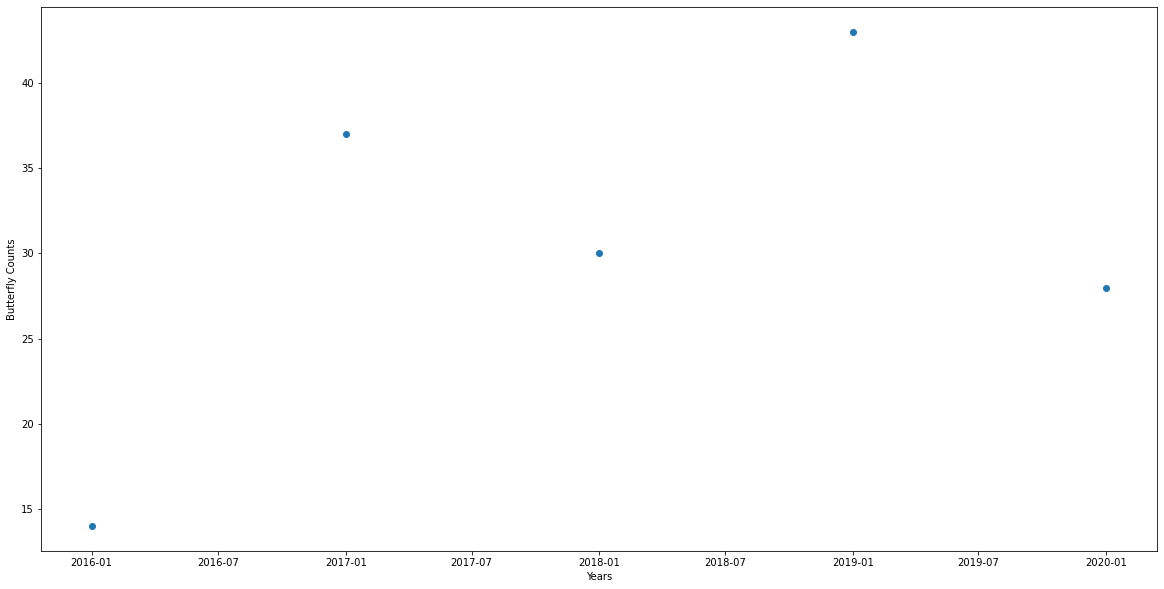

In [27]:
# initial graph. note y-axis with counts.Date is a COUNT of total dates grouped by month; it is not the actual date
fig = plt.figure(figsize=(20, 10))
plt.scatter(counts.year, counts.sighting_date)
plt.xlabel('Years')
plt.ylabel('Butterfly Counts')

plt.show()

In [28]:
# using reshape
counts["year"] = counts["year"].apply(lambda x: x.toordinal())
# using reshape
X = counts.year.values.reshape(-1, 1)

In [29]:
# setting the y axis as the count of dates
y = counts.sighting_date.values.reshape(-1, 1)

In [30]:
# Training the data set

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
  
#regr = LinearRegression()
  
#regr.fit(X_train, y_train)
#print(regr.score(X_test, y_test))
#print(r2_score(y_test, regr.predict(X_test)))

In [31]:
print(X)

[[735964]
 [736330]
 [736695]
 [737060]
 [737425]]


In [32]:
# setting the model
model = LinearRegression()

In [33]:
# fitting the model
model.fit(X, y)

LinearRegression()

In [34]:
# number of predictions
y_pred = model.predict(X)
print(y_pred.shape)

(5, 1)


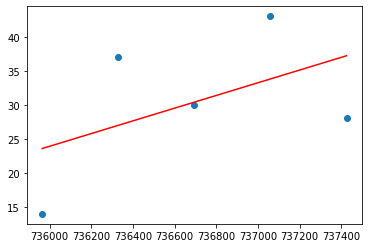

In [35]:
# a straight line for linear regression
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [36]:
# creating a polynomial function that allows us to input degrees for fitting
def fit_and_plot_poly_deg(degree):
    poly_feat = PolynomialFeatures(degree)
    X_poly = poly_feat.fit_transform(X)
    
    print('X_poly shape is: {}'.format(str(X_poly.shape)))

    poly_model = LinearRegression().fit(X_poly, y)
    y_pred = poly_model.predict(X_poly)

    plt.scatter(X, y, zorder=3)
    plt.plot(X, y_pred, color='black');

X_poly shape is: (5, 3)


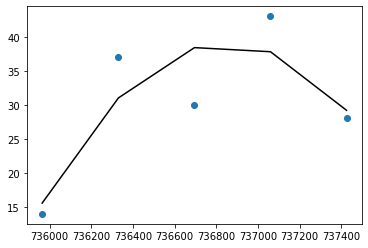

In [37]:
# two degree fit
fit_and_plot_poly_deg(2)

X_poly shape is: (5, 4)


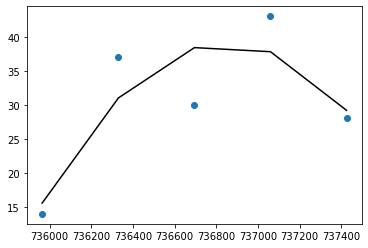

In [38]:
# 3rd degree fit
fit_and_plot_poly_deg(3)

X_poly shape is: (5, 7)


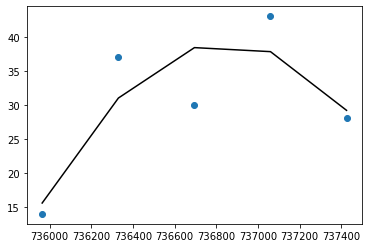

In [39]:
# 4th degree
fit_and_plot_poly_deg(6)